# 风险溢价

## 加载模块

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
from numpy.lib.stride_tricks import as_strided as stride

## 读入文件

In [2]:
df_merge = pd.read_csv('../data/stock-accounting.csv')
df_merge['date'] = pd.to_datetime(df_merge['date'])

## Fama-MacBeth 回归

剔除 `nan` 数据

In [3]:
idx_fac = ['beta', 'market-cap', 'book-to-market', 'profit', 'investment', 'past-return']
par = ['const'] + idx_fac
df_fit = df_merge[['date', 'stg', 'RET-RF'] + idx_fac].copy()
df_fit = df_fit.replace([np.inf, -np.inf], np.nan)
df_fit = df_fit.dropna()
df_fit.shape[0]

988727

                            OLS Regression Results                            
Dep. Variable:                 RET-RF   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2681.
Date:                Sat, 14 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:41:04   Log-Likelihood:             2.7999e+05
No. Observations:              988727   AIC:                        -5.600e+05
Df Residuals:                  988720   BIC:                        -5.599e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0086      0.000     46.

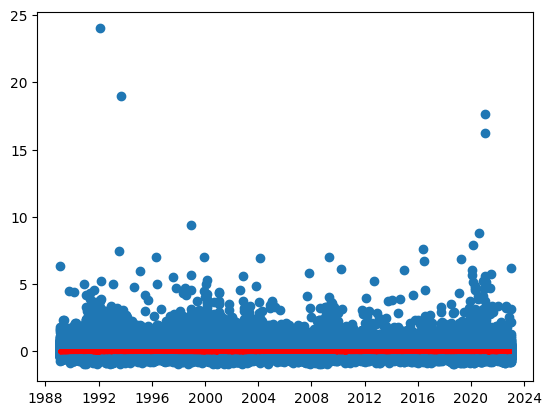

In [6]:
x = df_fit.loc[df_fit['stg'] != 'Unknow', idx_fac]
x = df_fit[idx_fac]
z = (x - x.mean()) / x.std()
z[z > 3] = 3
z[z < -3] = -3
z = sm.add_constant(z)
y = df_fit.loc[df_fit['stg'] != 'Unknown', 'RET-RF']
y = df_fit['RET-RF']
result = sm.OLS(y, z).fit()
print(result.summary())
print(result.params * 100)
y_pred = result.predict(z)
plt.scatter(df_fit['date'], y)
plt.plot(df_fit['date'], y_pred, color='red')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 RET-RF   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     4.596
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           0.000147
Time:                        15:37:22   Log-Likelihood:                 371.86
No. Observations:                 514   AIC:                            -729.7
Df Residuals:                     507   BIC:                            -700.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0465      0.005      8.

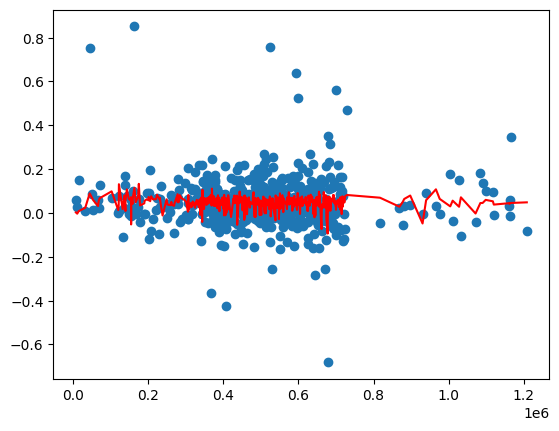

const             0.726865
beta             -0.070414
market-cap        0.271421
book-to-market    -3.30066
profit           -0.846909
investment       -0.606044
past-return      -0.769747
dtype: object
const               2.45823
beta              -0.715831
market-cap         2.438531
book-to-market   -22.490395
profit            -5.865534
investment        -6.121272
past-return        -7.65413
dtype: object


In [5]:
time_series = df_merge['date'].unique()
time_series = np.sort(time_series)

df_params = pd.DataFrame(columns=['date'] + par)

for i, t in enumerate(time_series):
    df_date = df_fit[(df_fit['date'] == t) & (df_fit['stg'] == 'Growth')]
    x = df_date[idx_fac]
    z = (x - x.mean()) / x.std()
    z[z > 3] = 3
    z[z < -3] = 3
    z = sm.add_constant(z)
    y = df_date[['RET-RF']]
    result = sm.OLS(y, z).fit()
    df_params.loc[i, 'date'] = t
    df_params.loc[i, z.columns] = result.params

    if i == 0:
        print(result.summary())
        y_pred = result.predict(z)
        plt.scatter(z.index, y)
        plt.plot(z.index, y_pred, color='red')
        plt.show()

print(df_params[par].mean() * 100)
print(np.sqrt(408) * df_params[par].mean() / df_params[par].std())

## 风险溢价估计

## 多空投资组合

## 滚动窗口估值

## EXHIBIT 9